# Ford GoBike

## by Jeyan Çınar

## Investigation Overview

> Ford GoBike is a bike sharing system powered both by Lyft and Ford in San Francisco Bay Area. Thousands of bikes to pick up and drop off anywhere - connecting people to work, friends and their favorite restaurant. Pocket friendly subscriptions and 24/7 available stations make it more compelling to ride. Unfortunately they're not in use anymore - it seems Lyft has pulled away from Ford's project due to some technical problems with the bikes themselves in 2019. But for the sake of this project I'll look into the data from February 2019 to see if I can spot any trends. 


## Dataset Overview

> The data has 174952 entries and 13 rows. These include data in date & time, string and numeric formats.
- Start & end times indicate when the bike was picked up from & left at the station.
- Similarly start & end station names are also given.
- Bike IDs indicate the individual bike identifications.
- User type indicates if the rider has a subscription or doesn't.
- Member gender is the gender identifier of the rider.
- Duration is the length of the trip in minutes.
- Start & end weekdays indicate the name of the days the trip took place.
- Similarly start & end hours indicate the time of the days.
- Member age is calculated by extracting member's birth year given from the data set's year, 2019.

In [22]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [23]:
# load in the dataset into a pandas dataframe
fordgo = pd.read_csv('fordgo_v2.csv')

## Trip Durations

> Trip durations variate around 12 minutes.

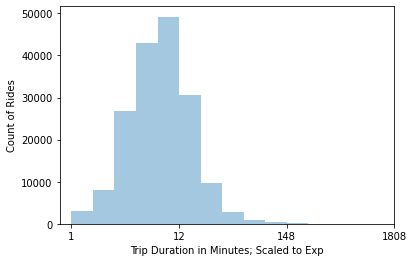

In [24]:
def exp_trans(x, inverse = False):
    if not inverse:
        return np.log(x)
    else:
        return np.exp(x)    

data = fordgo['duration_min'];

bin_edges = np.arange(0, exp_trans(data.max())+0.5, 0.5);
tick_locs = np.arange(0, exp_trans(data.max())+2.5, 2.5);

sb.distplot(data.apply(exp_trans), bins = bin_edges, kde = False);

plt.xticks(tick_locs, exp_trans(tick_locs, inverse = True).astype(int));
plt.xlabel('Trip Duration in Minutes; Scaled to Exp')
plt.ylabel('Count of Rides');

## User Types & Member Gender Distributions

> 91% of the riders have subscriptions to the Lyft system, as opposed to a 9% of walk-in customers.

> 75% of the riders identify as male and 24 % as female.

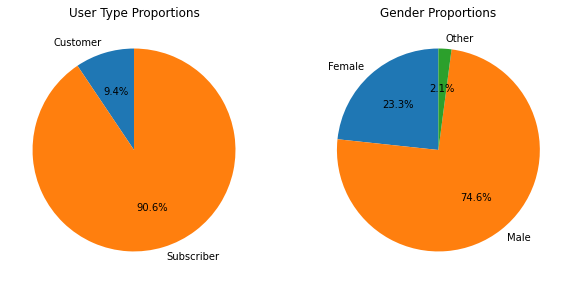

In [25]:
plt.figure(figsize = [10, 10])

plt.subplot(1, 2, 1)
fordgo.groupby('user_type').size().plot(kind = 'pie', x = 'user_type', y = 0, startangle = 90, 
                                    autopct = '%1.1f%%', legend = False)
plt.title('User Type Proportions')
plt.ylabel(None);

plt.subplot(1, 2, 2)
fordgo.groupby('member_gender').size().plot(kind = 'pie', x = 'member_gender', y = 0, startangle = 90, 
                                    autopct = '%1.1f%%', legend = False)
plt.title('Gender Proportions')
plt.ylabel(None);

## Top 5 Stations
> Here are the top 5 of most preferred stations as starting points.


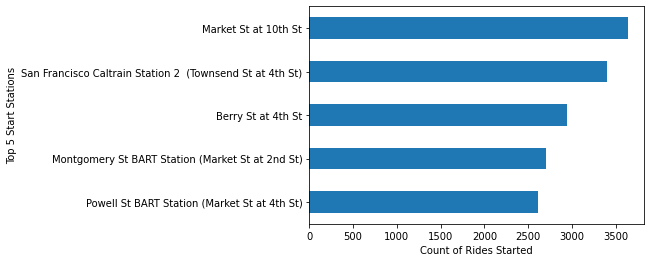

In [26]:
start_station = fordgo["start_station_name"].value_counts().nlargest(5)
start_station.sort_values(ascending = True).plot(kind = 'barh')
plt.ylabel('Top 5 Start Stations')
plt.xlabel('Count of Rides Started');

## Hour of Day vs. Member's Age
> Although the mean age of 32 is consistent throughout the working hours, it's interesting to see a wide range of ages active at 3 & 4 a.m.

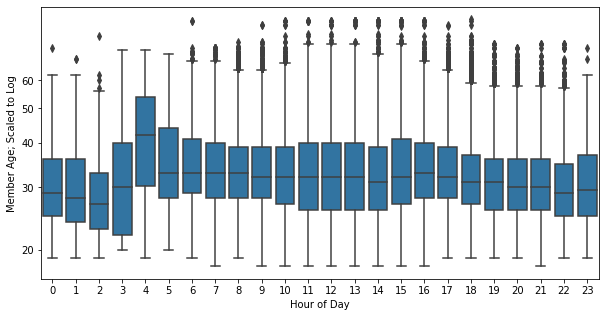

In [27]:
base_color = sb.color_palette()[0]
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)    

age_log = fordgo['member_age']

plt.figure(figsize = [10, 5])

sb.boxplot(data = fordgo, x = 'start_hour', y = age_log.apply(log_trans), color = base_color)
plt.yticks(log_trans(np.array([20, 30, 40, 50, 60])), ['20', '30', '40', '50', '60'])
plt.ylabel('Member Age; Scaled to Log')
plt.xlabel('Hour of Day');

## User Types Across Week Days vs. Trip Duration
> Weekends seem to be more occupied by walk-in customers with longer trips up to 24 minutes. 

> Subscribers seem to stick to a mean of 10 - 12 minutes every day. 

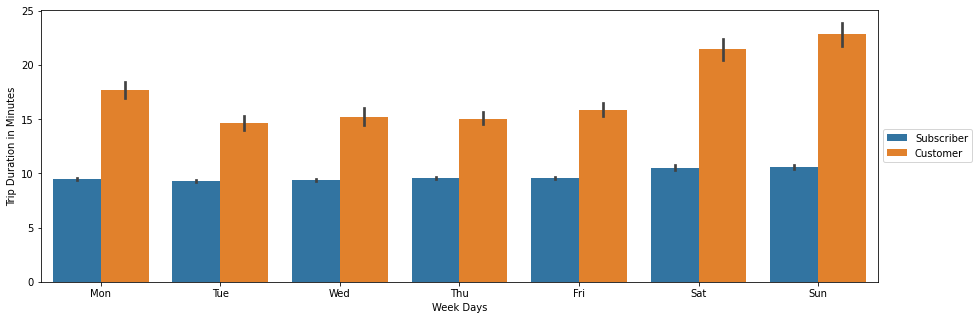

In [28]:
ordinal_var_dict = {'start_weekday': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    fordgo[var] = fordgo[var].astype(ordered_var)

plt.figure(figsize = [15, 5])
ax = sb.barplot(data = fordgo, x = 'start_weekday', y = 'duration_min', hue = 'user_type')
plt.xlabel('Week Days')
plt.ylabel('Trip Duration in Minutes')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

## User Types Across Hours of Day vs. Trip Duration
> Walk-in customers tend to take longer trips than subscribers in general - the difference is more prominent during work hours, by 15 minutes.

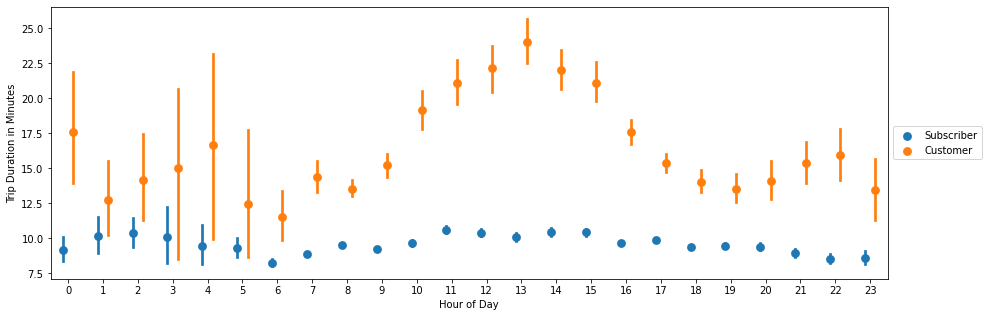

In [29]:
plt.figure(figsize = [15, 5])
ax = sb.pointplot(data = fordgo, x = 'start_hour', y = 'duration_min', hue = 'user_type', linestyles = '', dodge = 0.3)
plt.xlabel('Hour of Day')
plt.ylabel('Trip Duration in Minutes')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));